In [1]:
import nltk

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jash\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Jash\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Jash\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
text = "Microsoft Corporation is an American multinational corporation and technology conglomerate headquartered in Redmond, Washington."
# text = "Software Engineer with 5 years experience at Google, skilled in Python, Java, and cloud computing."

In [4]:
import spacy

In [5]:
# !python -m spacy download en_core_web_sm

In [6]:
nlp = spacy.load('en_core_web_sm')

In [7]:
NERWords = nlp(text)
NERWords.ents

(Microsoft Corporation, American, Redmond, Washington)

In [8]:
for ent in NERWords.ents:
    print(ent,':',ent.label_)

Microsoft Corporation : ORG
American : NORP
Redmond : GPE
Washington : GPE


In [9]:
import re
from nltk.corpus import stopwords 

# text = text.lower()
# text = re.sub(r'[^a-z\s]','',text)

stopsWords = stopwords.words('english')
# words = nltk.word_tokenize(text)
# tokens = [word for word in words if word not in stopsWords]
tokens = nltk.word_tokenize(text)

In [10]:

POSList = nltk.pos_tag(tokens)
POSList

[('Microsoft', 'NNP'),
 ('Corporation', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('American', 'JJ'),
 ('multinational', 'JJ'),
 ('corporation', 'NN'),
 ('and', 'CC'),
 ('technology', 'NN'),
 ('conglomerate', 'NN'),
 ('headquartered', 'VBN'),
 ('in', 'IN'),
 ('Redmond', 'NNP'),
 (',', ','),
 ('Washington', 'NNP'),
 ('.', '.')]

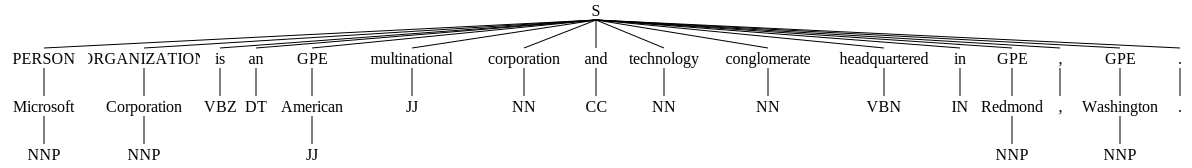

In [11]:
nltk.ne_chunk(POSList)

In [12]:
print(nltk.ne_chunk(POSList))

(S
  (PERSON Microsoft/NNP)
  (ORGANIZATION Corporation/NNP)
  is/VBZ
  an/DT
  (GPE American/JJ)
  multinational/JJ
  corporation/NN
  and/CC
  technology/NN
  conglomerate/NN
  headquartered/VBN
  in/IN
  (GPE Redmond/NNP)
  ,/,
  (GPE Washington/NNP)
  ./.)


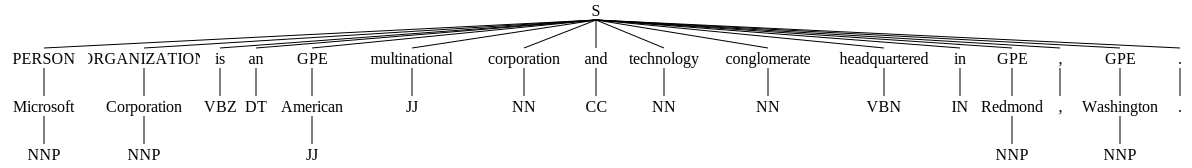

In [14]:
tree = nltk.ne_chunk(POSList)
tree

In [15]:
for subtree in tree:
    if hasattr(subtree, 'label'):
        entity = " ".join([token for token, pos in subtree])
        label = subtree.label()
        print(f"{entity} — {label}")

Microsoft — PERSON
Corporation — ORGANIZATION
American — GPE
Redmond — GPE
Washington — GPE
